# Use decision trees to prepare a model on fraud data 
# treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [74]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [75]:
# Load the data set 'Fraud_check.csv'
df = pd.read_csv('Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [76]:
# Basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [77]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [78]:
df.duplicated().sum()

0

# From the above, we can say that there are no null values and duplicated values in the data

In [79]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [80]:
# One hot encoding by using pandas
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [81]:
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


In [82]:
# Create bins based on the given statistics
bins = [10003, 30000, 99619]  # Define bin edges
labels = ['Risky', 'Good']  # Define labels for the bins

In [83]:
# Create a new column 'Income_Category' with the bin labels
df['Income_Category'] = pd.cut(df['Taxable.Income'], bins=bins, labels=labels)

In [84]:
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Income_Category
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good


In [85]:
df = df.fillna('Good')

In [86]:
df['Income_Category'].value_counts()

Good     477
Risky    123
Name: Income_Category, dtype: int64

In [87]:
df['Income_Category']=df['Income_Category'].map({'Good':1,'Risky':0})

In [88]:
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Income_Category
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1


In [89]:
df['Income_Category'].value_counts()

1    477
0    123
Name: Income_Category, dtype: int64

In [90]:
##Droping the Taxable income variable
df.drop(["Taxable.Income"],axis=1,inplace=True)

In [91]:
df.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Income_Category
0,50047,10,0,0,1,1,1
1,134075,18,1,0,0,1,1
2,160205,30,0,1,0,1,1
3,193264,15,1,0,1,1,1
4,27533,28,0,1,0,0,1


In [92]:
# # Define the features (X) and the target variable (y)
x = df.drop('Income_Category',axis = 1)
y = df['Income_Category']

In [93]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Income_Category, Length: 600, dtype: category
Categories (2, int64): [0 < 1]

In [94]:
# import the train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [95]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [96]:
# import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [97]:
dt = DecisionTreeClassifier(criterion = "entropy",max_depth=4)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

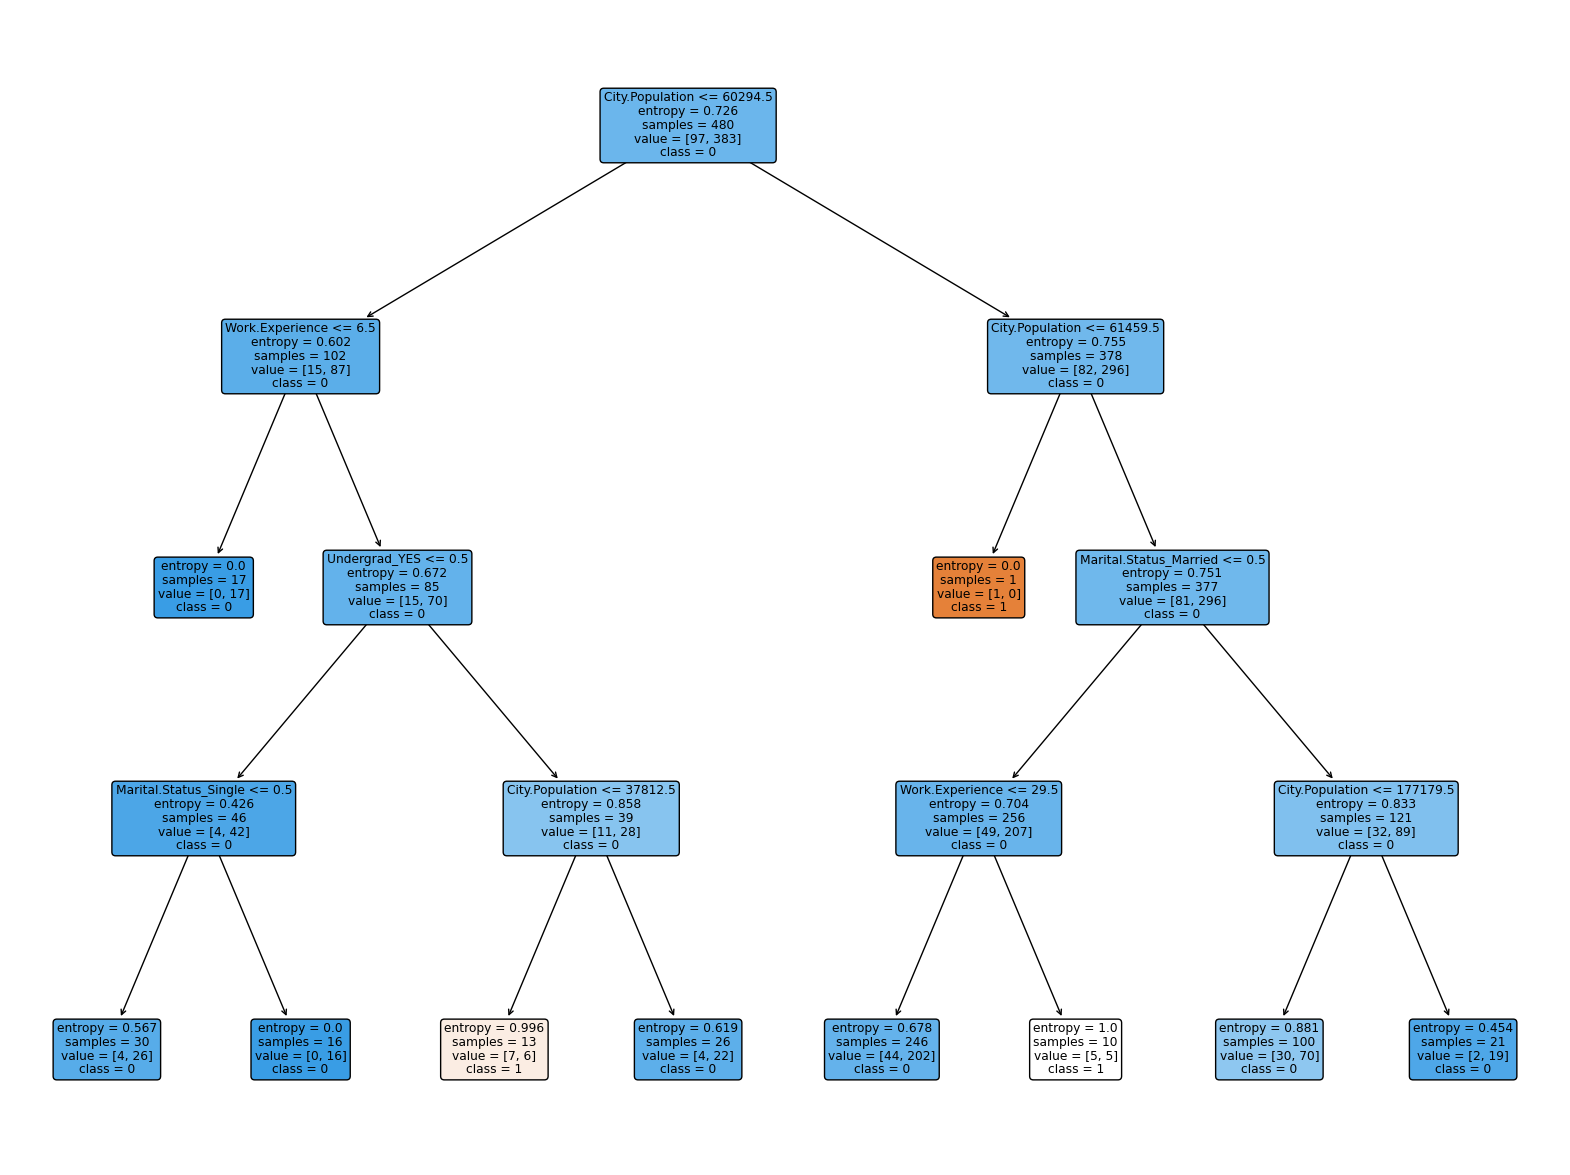

In [98]:
from sklearn.tree import plot_tree

# Convert class names and feature names to string format
class_names = list(map(str, y.unique().tolist()))  # Convert class names to strings
feature_names = list(map(str, x.columns.tolist()))  # Convert feature names to strings

plt.figure(figsize=(20, 15))
plot_tree(dt, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()


In [99]:
# predict on the train data & test data
pred_train = dt.predict(x_train)
pred_test = dt.predict(x_test)

In [100]:
pred_train[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [101]:
pred_test[:5]

array([1, 1, 1, 1, 1], dtype=int64)

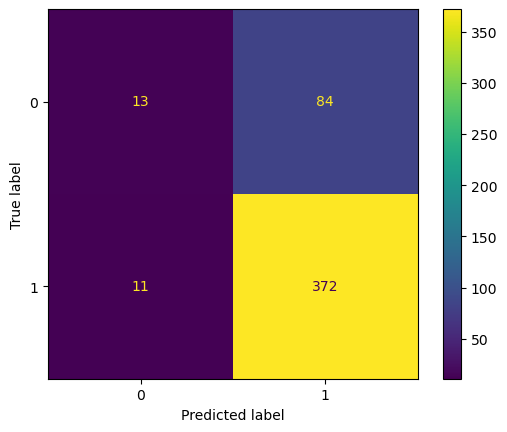

In [102]:
# plot confusion matrix for train data
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
ConfusionMatrixDisplay.from_estimator(dt,x_train,y_train,cmap='viridis');

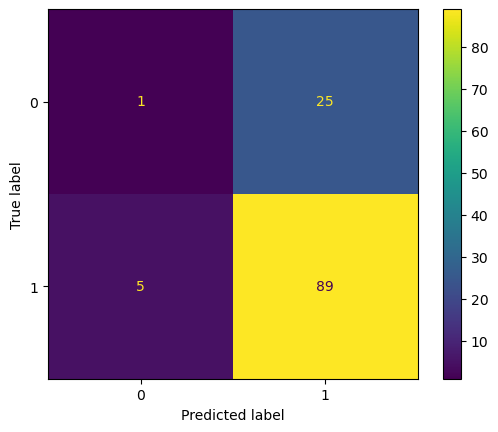

In [103]:
# plot confusion matrix for test data
ConfusionMatrixDisplay.from_estimator(dt,x_test,y_test,cmap = 'viridis');

In [104]:
# # calculate accuracy score for train data
acc_score = dt.score(x_train,y_train)

In [105]:
acc_score

0.8020833333333334

In [106]:
# calculate accuaracy score for test data
acc_score_test = dt.score(x_test,y_test)

In [107]:
acc_score_test

0.75

In [108]:
dt_g = DecisionTreeClassifier(max_depth=4)
dt_g.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

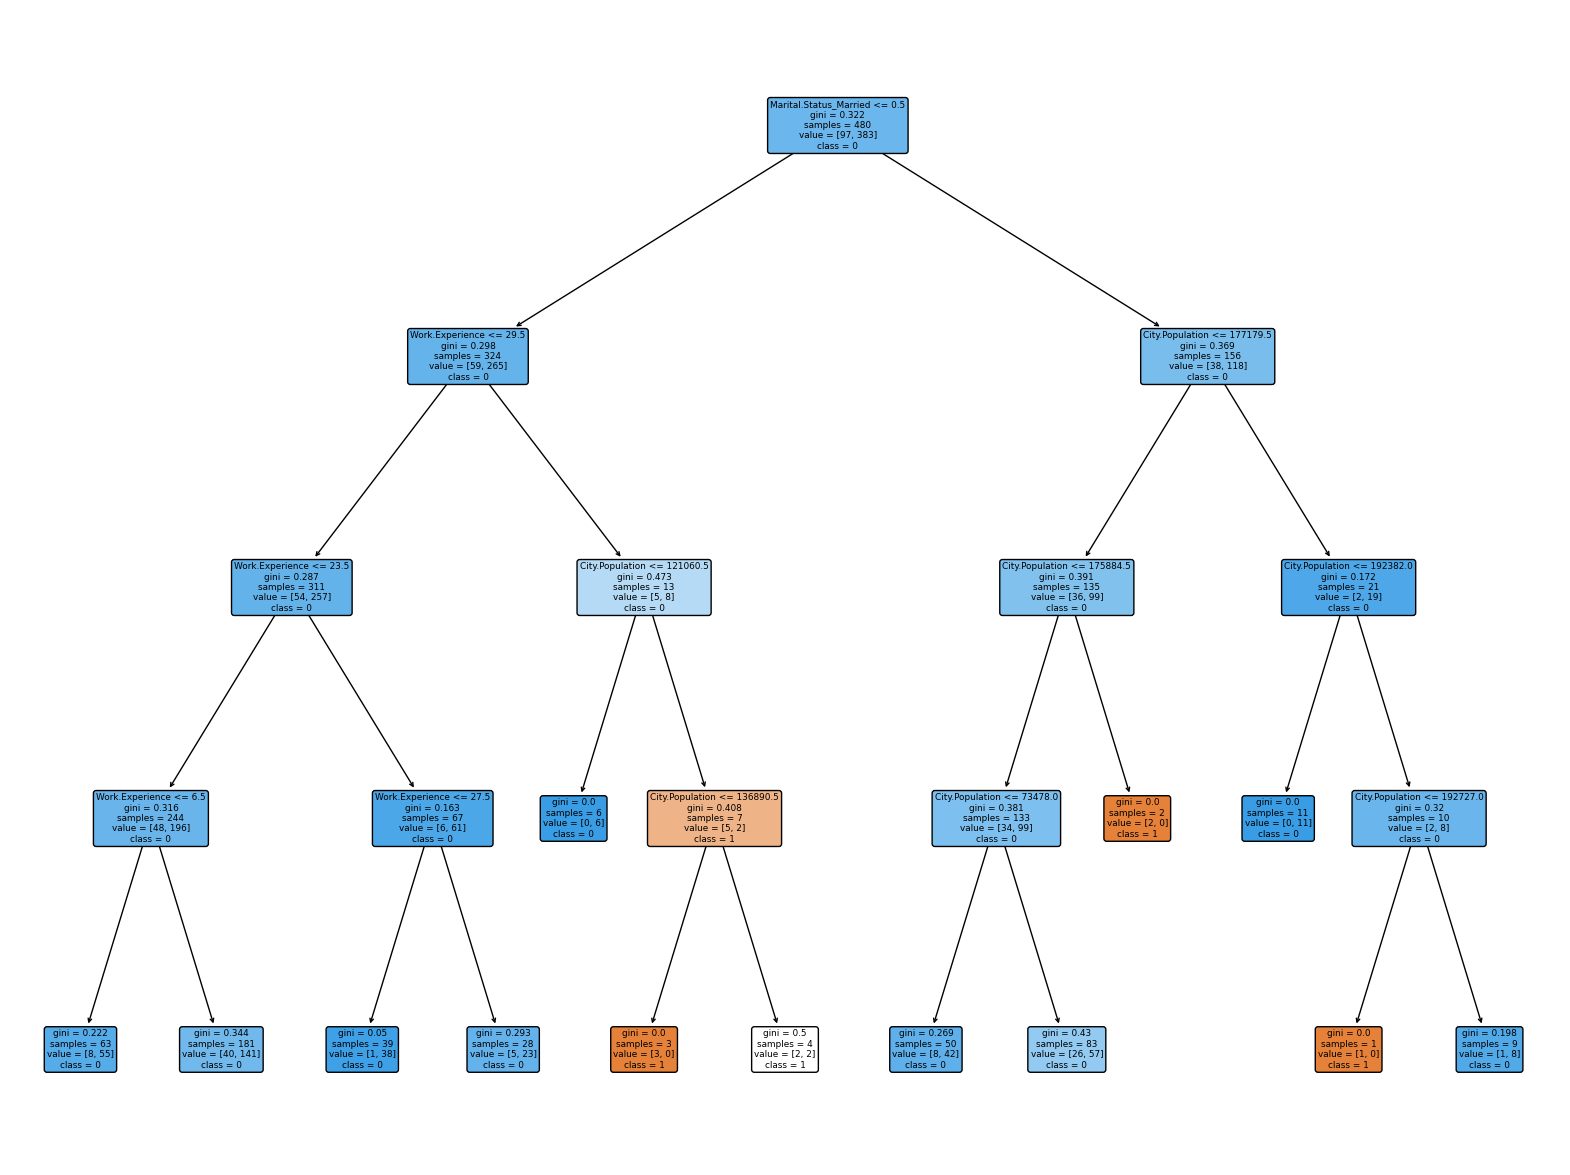

In [109]:
from sklearn.tree import plot_tree

# Convert class names and feature names to string format
class_names = list(map(str, y.unique().tolist()))  # Convert class names to strings
feature_names = list(map(str, x.columns.tolist()))  # Convert feature names to strings

plt.figure(figsize=(20, 15))
plot_tree(dt_g, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()

In [110]:
# predict on the train data & test data
pred_train_g = dt_g.predict(x_train)
pred_test_g = dt_g.predict(x_test)

In [111]:
pred_train_g[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [112]:
pred_test_g[:5]

array([1, 1, 1, 1, 1], dtype=int64)

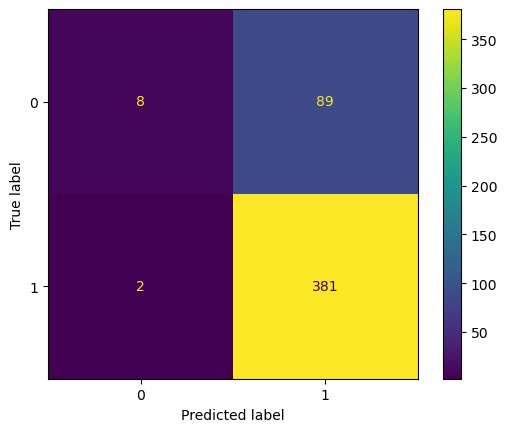

In [113]:
# plot confusion matrix for train data
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
ConfusionMatrixDisplay.from_estimator(dt_g,x_train,y_train,cmap='viridis');

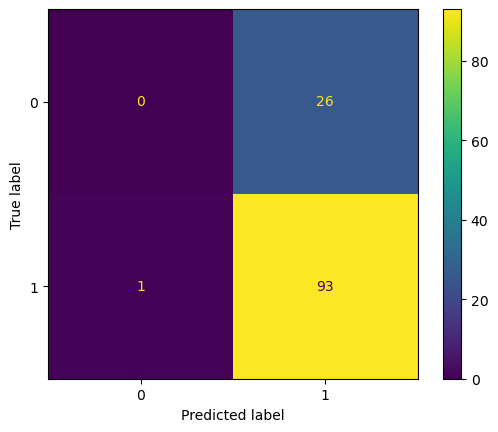

In [114]:
# plot confusion matrix for test data
ConfusionMatrixDisplay.from_estimator(dt_g,x_test,y_test,cmap = 'viridis');

In [115]:
# # calculate accuracy score for train data
acc_score_g = dt_g.score(x_train,y_train)

In [116]:
acc_score_g

0.8104166666666667

In [117]:
# calculate accuaracy score for test data
acc_score_test_g = dt_g.score(x_test,y_test)

In [118]:
acc_score_test_g

0.775

In [119]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [120]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, pred_test_g)
recall = recall_score(y_test, pred_test_g)
f1 = f1_score(y_test, pred_test_g)

In [121]:
precision

0.7815126050420168

In [122]:
#  precision of 0.78 means that about 78% of the instances predicted as "Risky" by the model are indeed "Risky."

In [123]:
recall

0.9893617021276596

In [124]:
# recall of 0.95 means that the model is capturing about 95% of the actual "Risky" instances.

In [125]:
f1

0.8732394366197184

In [126]:
# F1-score of 0.87 indicates a good balance between precision and recall.

In [127]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [128]:
best_dt =  DecisionTreeClassifier(max_depth=5,criterion='entropy',min_samples_leaf=1,min_samples_split=5)
best_dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)

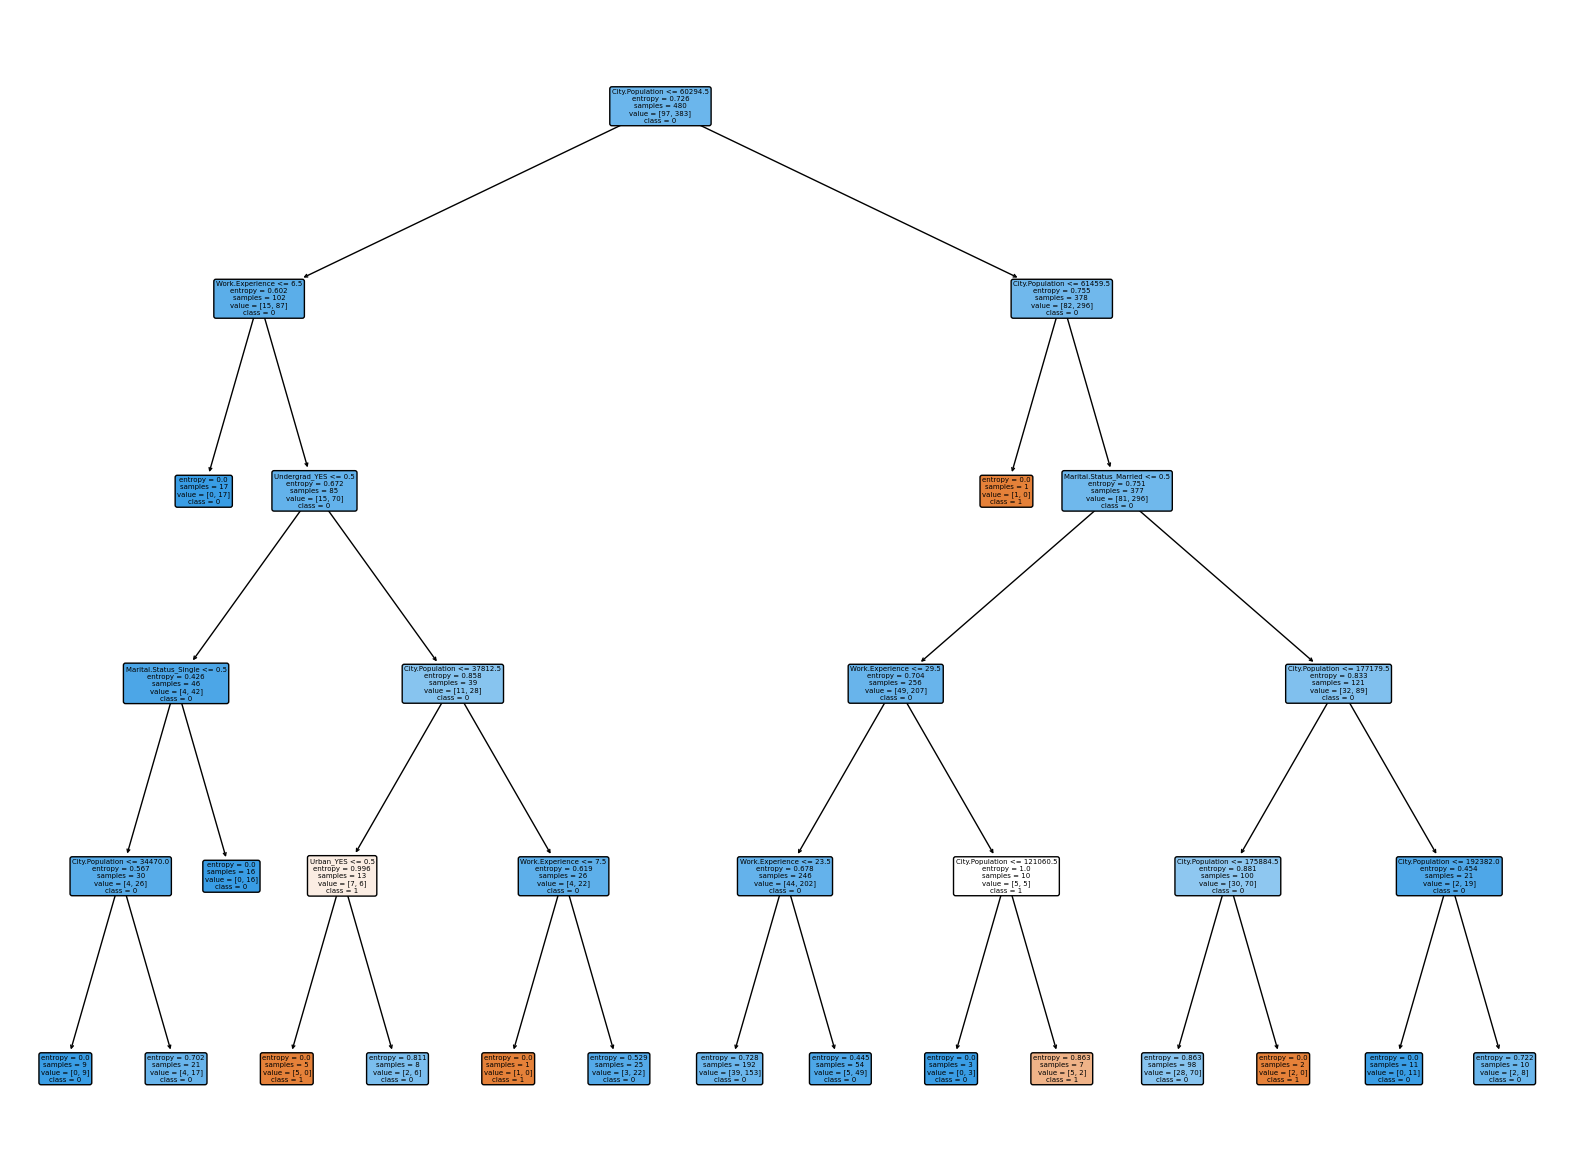

In [129]:
# Convert class names and feature names to string format
class_names = list(map(str, y.unique().tolist()))  # Convert class names to strings
feature_names = list(map(str, x.columns.tolist()))  # Convert feature names to strings

plt.figure(figsize=(20, 15))
plot_tree(best_dt, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()

In [130]:
# predict on the train data & test data
pred_train_best = best_dt.predict(x_train)
pred_test_best = best_dt.predict(x_test)

In [131]:
pred_test_best[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [132]:
pred_train_best[:5]

array([1, 1, 1, 1, 1], dtype=int64)

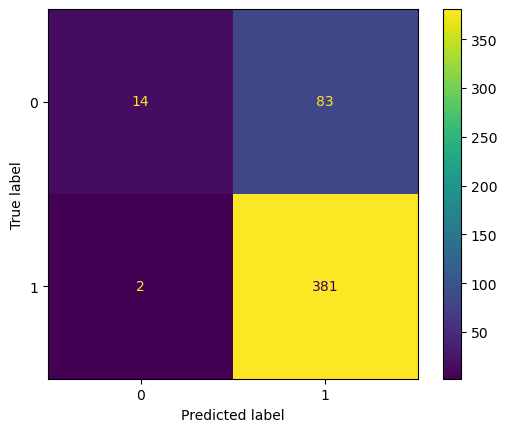

In [133]:
# confusion matrix display on train data
ConfusionMatrixDisplay.from_estimator(best_dt,x_train,y_train,cmap='viridis');

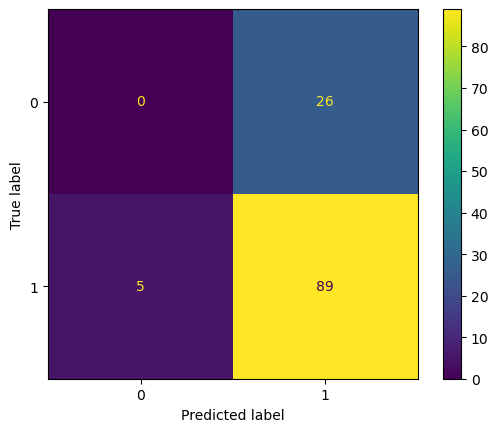

In [134]:
# plot confusion matrix for test data
ConfusionMatrixDisplay.from_estimator(best_dt,x_test,y_test,cmap = 'viridis');

In [135]:
# # calculate accuracy score for train data
acc_score_best_train = best_dt.score(x_train,y_train)

In [136]:
acc_score_best_train

0.8229166666666666

In [137]:
# calculate accuaracy score for test data
acc_score_best_test = best_dt.score(x_test,y_test)

In [138]:
acc_score_best_test

0.7416666666666667

In [139]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, pred_test_best)
recall = recall_score(y_test, pred_test_best)
f1 = f1_score(y_test, pred_test_best)

In [140]:
precision

0.7739130434782608

In [141]:
#  precision of 0.77 means that about 77% of the instances predicted as "Risky" by the model are indeed "Risky."

In [142]:
recall

0.9468085106382979

In [143]:
# recall of 0.94 means that the model is capturing about 94% of the actual "Risky" instances.

In [144]:
f1

0.8516746411483255

In [145]:
# F1-score of 0.85 indicates a good balance between precision and recall.

# Decision tree with default criterion value and max_depth = 4 is giving the best results